In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices-poland/Car_Prices_Poland_Kaggle.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/car-prices-poland/Car_Prices_Poland_Kaggle.csv')

In [4]:
print(df.isnull())

        Unnamed: 0   mark  model  generation_name   year  mileage  vol_engine  \
0            False  False  False            False  False    False       False   
1            False  False  False            False  False    False       False   
2            False  False  False            False  False    False       False   
3            False  False  False            False  False    False       False   
4            False  False  False            False  False    False       False   
...            ...    ...    ...              ...    ...      ...         ...   
117922       False  False  False            False  False    False       False   
117923       False  False  False            False  False    False       False   
117924       False  False  False            False  False    False       False   
117925       False  False  False            False  False    False       False   
117926       False  False  False            False  False    False       False   

         fuel   city  provi

In [5]:
# 1. Dealing with Missing Values
df.isnull().sum() 

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [6]:
# 2. Figuring out why the data is missing
#because not all car must have a genaration name

In [7]:
# 3. Eliminating extra variables
df = df.drop(['generation_name'], axis=1)

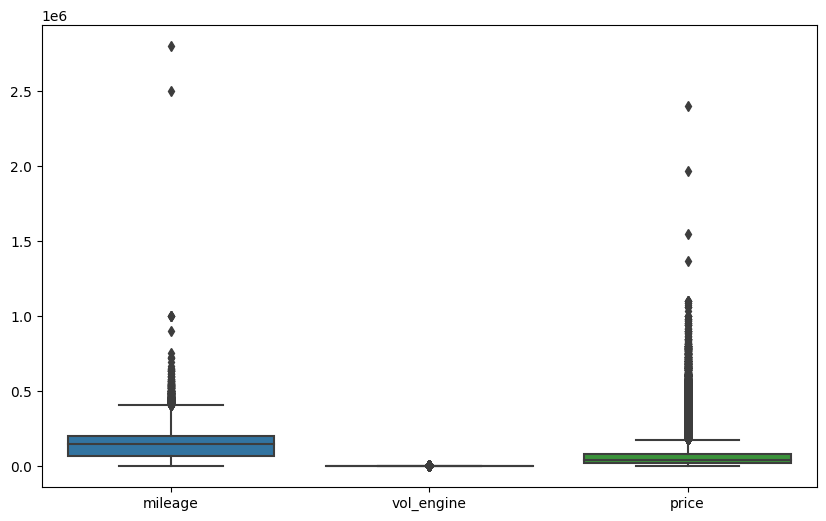

In [8]:
# 4. Detecting and removing outliers using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['mileage', 'vol_engine', 'price']])
plt.show()

In [9]:
# Remove outliers using z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df[['mileage', 'vol_engine', 'price']])) < 3).all(axis=1)]

In [10]:
#5- Scaling and Normalization.
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = [ 'mileage', 'vol_engine', 'price']
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the scaled and normalized dataset
print(df)

        Unnamed: 0   mark  model  year   mileage  vol_engine      fuel  \
0                0   opel  combo  2015  0.333895    0.334495    Diesel   
1                1   opel  combo  2018  0.076533    0.401769    Diesel   
2                2   opel  combo  2015  0.666117    0.428303    Diesel   
3                3   opel  combo  2016  0.113876    0.334495    Diesel   
4                4   opel  combo  2014  0.246411    0.375235       CNG   
...            ...    ...    ...   ...       ...         ...       ...   
117922      117922  volvo  xc-90  2020  0.095694    0.527741    Hybrid   
117923      117923  volvo  xc-90  2017  0.122010    0.527741    Diesel   
117924      117924  volvo  xc-90  2016  0.199761    0.527741  Gasoline   
117925      117925  volvo  xc-90  2017  0.416268    0.527741    Diesel   
117926      117926  volvo  xc-90  2016  0.452201    0.527741  Gasoline   

                    city       province     price  
0                  Janki    Mazowieckie  0.109181  
1      

In [11]:
# 6. Eliminating blank spaces or missing information 
df['mark'] = df['mark'].str.strip()
df['model'] = df['model'].str.strip()
df['fuel'] = df['fuel'].str.strip()
df['city'] = df['city'].str.strip()
df['province'] = df['province'].str.strip()

In [12]:
print(df)

        Unnamed: 0   mark  model  year   mileage  vol_engine      fuel  \
0                0   opel  combo  2015  0.333895    0.334495    Diesel   
1                1   opel  combo  2018  0.076533    0.401769    Diesel   
2                2   opel  combo  2015  0.666117    0.428303    Diesel   
3                3   opel  combo  2016  0.113876    0.334495    Diesel   
4                4   opel  combo  2014  0.246411    0.375235       CNG   
...            ...    ...    ...   ...       ...         ...       ...   
117922      117922  volvo  xc-90  2020  0.095694    0.527741    Hybrid   
117923      117923  volvo  xc-90  2017  0.122010    0.527741    Diesel   
117924      117924  volvo  xc-90  2016  0.199761    0.527741  Gasoline   
117925      117925  volvo  xc-90  2017  0.416268    0.527741    Diesel   
117926      117926  volvo  xc-90  2016  0.452201    0.527741  Gasoline   

                    city       province     price  
0                  Janki    Mazowieckie  0.109181  
1      

In [13]:
# 7. Arranging the data logically and sequentially
df = df.sort_values(by='year')

In [14]:
print(df)

        Unnamed: 0    mark    model  year   mileage  vol_engine      fuel  \
84888        84888    fiat      500  1945  0.162679    0.134012  Gasoline   
46958        46958    ford     f150  1952  0.002392    0.992763  Gasoline   
54239        54239    ford  mustang  1965  0.232057    0.884481  Gasoline   
54005        54005    ford  mustang  1966  0.159488    0.884481  Gasoline   
84723        84723    fiat      500  1967  0.188995    0.134012  Gasoline   
...            ...     ...      ...   ...       ...         ...       ...   
22566        22566    audi       q5  2022  0.000012    0.527473    Diesel   
22565        22565    audi       q5  2022  0.000012    0.527473    Diesel   
22564        22564    audi       q5  2022  0.000012    0.527473    Diesel   
101382      101382    mini      one  2022  0.000012    0.401769  Gasoline   
71723        71723  toyota     c-hr  2022  0.000002    0.532565    Hybrid   

             city            province     price  
84888      Kielce      Św

In [15]:
# 8. Grouping data in rows and columns
df_grouped = df.groupby(['mark', 'model'])['price'].mean().reset_index()
print(df)

        Unnamed: 0    mark    model  year   mileage  vol_engine      fuel  \
84888        84888    fiat      500  1945  0.162679    0.134012  Gasoline   
46958        46958    ford     f150  1952  0.002392    0.992763  Gasoline   
54239        54239    ford  mustang  1965  0.232057    0.884481  Gasoline   
54005        54005    ford  mustang  1966  0.159488    0.884481  Gasoline   
84723        84723    fiat      500  1967  0.188995    0.134012  Gasoline   
...            ...     ...      ...   ...       ...         ...       ...   
22566        22566    audi       q5  2022  0.000012    0.527473    Diesel   
22565        22565    audi       q5  2022  0.000012    0.527473    Diesel   
22564        22564    audi       q5  2022  0.000012    0.527473    Diesel   
101382      101382    mini      one  2022  0.000012    0.401769  Gasoline   
71723        71723  toyota     c-hr  2022  0.000002    0.532565    Hybrid   

             city            province     price  
84888      Kielce      Św

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
#9. Dimensionality Reduction using PCA
# Select the numerical columns for dimensionality reduction
numerical_columns = ['year', 'mileage', 'vol_engine', 'price']

# Standardize the numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a new DataFrame with the reduced dimensions
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Concatenate the reduced dimensions with the original DataFrame
df = pd.concat([df, df_pca], axis=1)

# 10. Dealing with Inconsistent Data Entry
# Convert the 'fuel' column to lowercase for consistency
df['fuel'] = df['fuel'].str.lower()

# Remove inconsistent entries in 'fuel' column
valid_fuels = ['diesel', 'gasoline', 'cng']
df = df[df['fuel'].isin(valid_fuels)]

# Output the processed data
df.to_csv('Processed_Car_Prices.csv', index=False)

In [18]:
print(df)

        Unnamed: 0  mark    model    year   mileage  vol_engine      fuel  \
84888      84888.0  fiat      500  1945.0  0.162679    0.134012  gasoline   
46958      46958.0  ford     f150  1952.0  0.002392    0.992763  gasoline   
54239      54239.0  ford  mustang  1965.0  0.232057    0.884481  gasoline   
54005      54005.0  ford  mustang  1966.0  0.159488    0.884481  gasoline   
84723      84723.0  fiat      500  1967.0  0.188995    0.134012  gasoline   
...            ...   ...      ...     ...       ...         ...       ...   
22567      22567.0  audi       q5  2022.0  0.000024    0.531761  gasoline   
22566      22566.0  audi       q5  2022.0  0.000012    0.527473    diesel   
22565      22565.0  audi       q5  2022.0  0.000012    0.527473    diesel   
22564      22564.0  audi       q5  2022.0  0.000012    0.527473    diesel   
101382    101382.0  mini      one  2022.0  0.000012    0.401769  gasoline   

             city            province     price       PC1       PC2  
84888

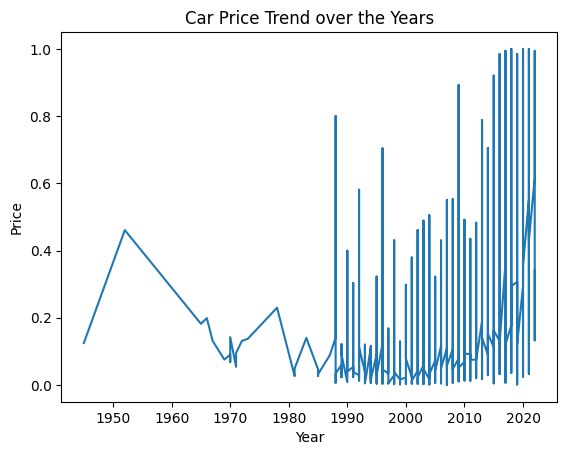

In [19]:
# 1. Line Plot
plt.plot(df['year'], df['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Car Price Trend over the Years')
plt.show()

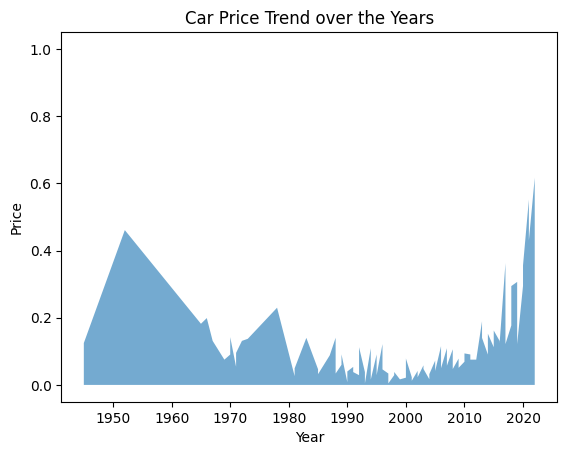

In [20]:
# 2. Area Plot
plt.fill_between(df['year'], df['price'], alpha=0.62)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Car Price Trend over the Years')
plt.show()

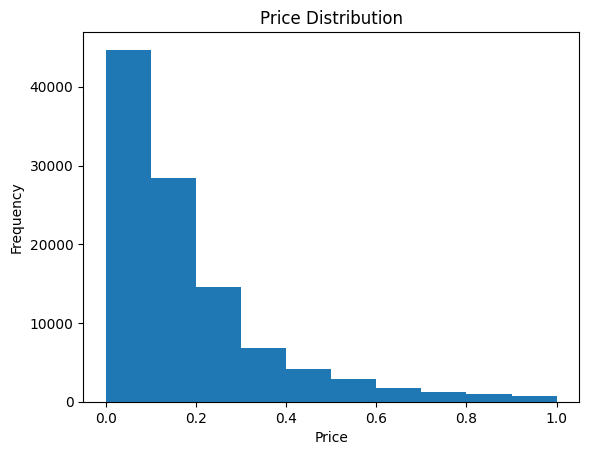

In [21]:
# 3. Histogram
plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

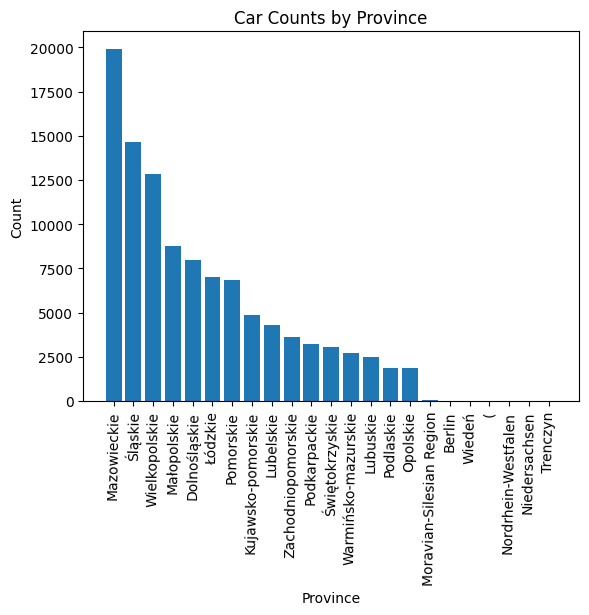

In [22]:
# 4. Bar Chart
province_counts = df['province'].value_counts()
plt.bar(province_counts.index, province_counts.values)
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Car Counts by Province')
plt.xticks(rotation=89)
plt.show()

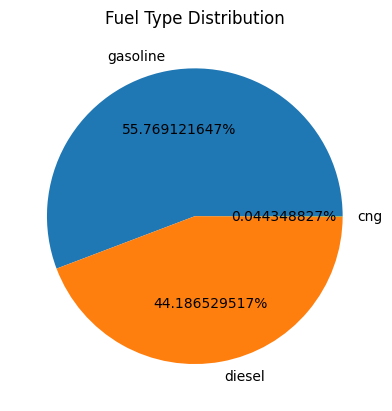

In [23]:
# 5. Pie Chart
fuel_counts = df['fuel'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.9f%%')
plt.title('Fuel Type Distribution')
plt.show()

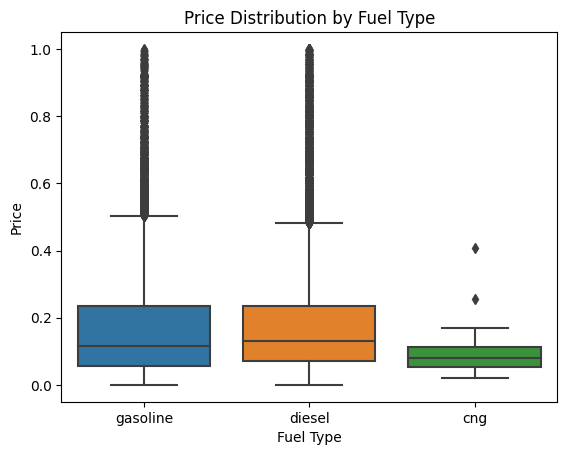

In [24]:
# 6. Box Plot
sns.boxplot(x=df['fuel'], y=df['price'])
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution by Fuel Type')
plt.show()

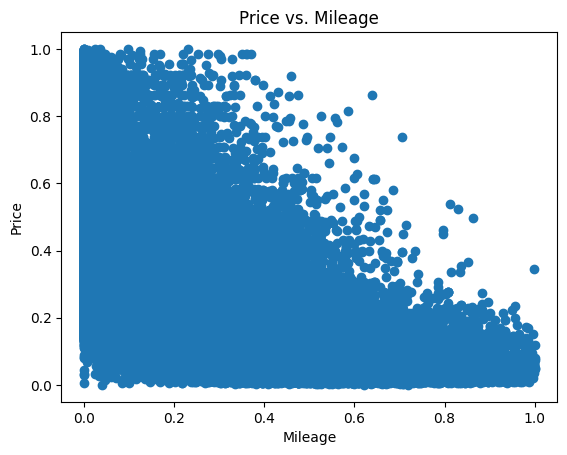

In [25]:
# 7. Scatter Plot
plt.scatter(df['mileage'], df['price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs. Mileage')
plt.show()

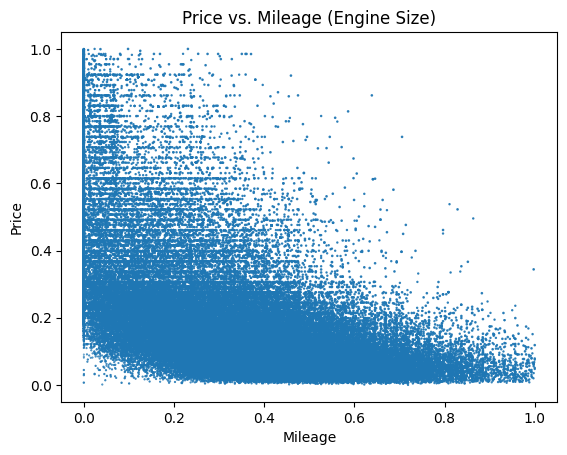

In [26]:
# 8. Bubble Plot
plt.scatter(df['mileage'], df['price'], s=df['vol_engine'], alpha=0.9)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs. Mileage (Engine Size)')
plt.show()